In [344]:
import pandas as pd

afl_finalists = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_finalists.csv')
afl_margins = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_margins.csv')

In [345]:
print(afl_finalists)

        afl.finalists
0            Hawthorn
1           Melbourne
2             Carlton
3           Melbourne
4            Hawthorn
..                ...
395            Sydney
396           Geelong
397  Western Bulldogs
398          St Kilda
399          St Kilda

[400 rows x 1 columns]


In [346]:
print(afl_margins)

     afl.margins
0             56
1             31
2             56
3              8
4             32
..           ...
171           28
172           38
173           29
174           10
175           10

[176 rows x 1 columns]


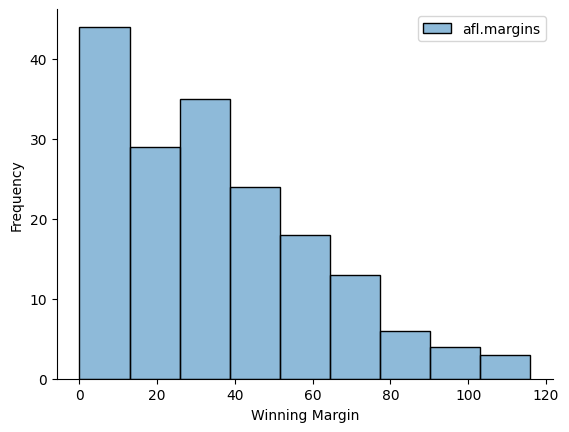

In [347]:
import seaborn as sns

ax = sns.histplot(afl_margins)

ax.set(xlabel ="Winning Margin", 
                ylabel = "Frequency")

sns.despine()

In [348]:
margins = afl_margins['afl.margins']

sum(margins)

6213

In [349]:
afl_margins[0:5]

,afl.margins
0,56
1,31
2,56
3,8
4,32


In [350]:
margins[0:5]

0    56
1    31
2    56
3     8
4    32
Name: afl.margins, dtype: int64

In [351]:
sum(margins[0:5])/5

36.6

In [352]:
margins[0:5].mean()

36.6

In [353]:
type(margins)

pandas.core.series.Series

In [354]:
dir(margins)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__rep

In [355]:
margins.mean()

35.30113636363637

In [356]:
import statistics
print(statistics.mean(margins))

35.30113636363637


In [357]:
a = list(margins)
print(statistics.mean(a))

35.30113636363637


In [358]:
print(statistics.mean(margins[0:5]))

36.6


In [359]:
len(afl_margins)

176

In [360]:
sorted_margins = afl_margins.sort_values(by = 'afl.margins')

# 176
# 176 / 2 = 88
# we get the 8 middle values for demonstration
# median will average of 88th and 89th value
# or median is average of 87 and 88 index

sorted_margins[84:92]

,afl.margins
165,29
173,29
150,29
117,30
1,31
4,32
123,32
136,33


In [361]:
median = sum(sorted_margins['afl.margins'][87:89])/2
median

30.5

In [362]:
margins.median()

30.5

### What is "data at nominal scale"?

If your data are on a nominal scale, it means that the values represent distinct categories or labels without any inherent order or numerical meaning. In a nominal scale, the values are typically used to identify and classify different groups or entities.

For example, if you have a dataset representing different colors, where the values are "Red," "Blue," and "Green," this data is on a nominal scale. The values simply serve as labels for different categories and do not have any inherent order or numerical interpretation.

When working with data on a nominal scale, you typically perform operations based on the categories themselves, such as counting the frequency of each category or performing categorical analysis. Statistical techniques used for nominal data include chi-square tests, contingency tables, and mode calculation.

It's important to handle nominal data appropriately by understanding its limitations and selecting appropriate analysis techniques that are suitable for categorical data.

### What is "data at ordinal scale"?

If your data are on an ordinal scale, it means that the values have a meaningful order or ranking. In an ordinal scale, the values can be compared in terms of greater than, less than, or equal to each other, but the differences between the values may not be meaningful or consistent.

For example, if you have a dataset representing different levels of customer satisfaction, where the values are "Low," "Medium," and "High," this data is on an ordinal scale. You can say that "High" is greater than "Medium," and "Medium" is greater than "Low," but you cannot quantify the exact difference in satisfaction between "High" and "Medium" or assign numerical values to the categories.

When dealing with ordinal scale data, it's important to use appropriate statistical techniques that are suitable for this type of data, such as non-parametric tests or rank-based analysis.

### Guide on when to use what
![Alt text](images/Screenshot%202023-06-02%20at%2010.14.13%20AM.png)


Knowing how to calculate means and medians is only a part of the story. You also need to understand what each one is saying about the data, and what that implies for when you should use each one. This is illustrated in Fig. 5.2. The mean is kind of like the “centre of gravity” of the data set, whereas the median is the “middle value” in the data. What this implies, as far as which one you should use, depends a little on what type of data you’ve got and what you’re trying to achieve. As a rough guide:

If your data are nominal scale, you probably shouldn’t be using either the mean or the median. Both the mean and the median rely on the idea that the numbers assigned to values are meaningful. If the numbering scheme is arbitrary, then it’s probably best to use the Mode instead.

If your data are ordinal scale, you’re more likely to want to use the median than the mean. The median only makes use of the order information in your data (i.e., which numbers are bigger), but doesn’t depend on the precise numbers involved. That’s exactly the situation that applies when your data are ordinal scale. The mean, on the other hand, makes use of the precise numeric values assigned to the observations, so it’s not really appropriate for ordinal data.

For interval and ratio scale data, either one is generally acceptable. Which one you pick depends a bit on what you’re trying to achieve. The mean has the advantage that it uses all the information in the data (which is useful when you don’t have a lot of data), but it’s very sensitive to extreme values, as we’ll see when we look at trimmed means.

### Example on when median is more appropriate than mean
Let’s expand on that last part a little. One consequence is that there’s systematic differences between the mean and the median when the histogram is asymmetric (or “skewed”: for more detail, see the section on skew and kurtosis). This is illustrated in Fig. 5.2, above. Notice that the median (right hand side) is located closer to the “body” of the histogram, whereas the mean (left hand side) gets dragged towards the “tail” (where the extreme values are). To give a concrete example, suppose Bob (income $50,000), Kate (income $60,000) and Jane (income $65,000) are sitting at a table: the average income at the table is $58,333 and the median income is $60,000. Then Bill sits down with them (income $100,000,000). The average income has now jumped to $25,043,750 but the median rises only to $62,500. If you’re interested in looking at the overall income at the table, the mean might be the right answer; but if you’re interested in what counts as a typical income at the table, the median would be a better choice here.